In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Loading the csv file
df1 = pd.read_csv("movies.csv")

In [3]:
# Loading the csv file
df2 = pd.read_csv("ratings.csv")

In [4]:
# Reading the dataframe
df1.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
df2.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [8]:
df1.describe()

,movieId
count,9742.000000
mean,42200.353623
std,52160.494854
min,1.000000
25%,3248.250000
50%,7300.000000
75%,76232.000000
max,193609.000000


In [9]:
df2.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


### What is the shape of "movies.csv"?

In [10]:
# Checking the shape of the dataframe
df1.shape

(9742, 3)

### What is the shape of "ratings.csv"?

In [11]:
df2.shape

(100836, 4)

### How many unique "userId" are available in "ratings.csv"?

In [12]:
# Checking the number of unique userid's
unique_userid = df2["userId"].nunique()
unique_userid

610

In [13]:
df2["userId"].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

### Which movie has recieved maximum number of user ratings?

In [14]:
# Group by movieId and count the number of ratings for each movie
movie_ratings_count = df2.groupby('movieId').size()

# Find the movieId with the maximum number of ratings
max_ratings_movie_id = movie_ratings_count.idxmax()

# Merge df2 with df1 to get the movie title
max_ratings_movie = pd.merge(df2[df2['movieId'] == max_ratings_movie_id], df1, on='movieId')

# Print the result
print(f"The movie with the maximum number of user ratings is '{max_ratings_movie['title'].iloc[0]}' with movieId {max_ratings_movie_id}.")


The movie with the maximum number of user ratings is 'Forrest Gump (1994)' with movieId 356.


In [15]:
#Loading csv
df3 = pd.read_csv("tags.csv")

In [16]:
df3.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


### Select all the correct tags submitted by users to "Matrix, The (1999)" movie?

In [17]:
# Finding the movieId of "Matrix, The (1999)"
df1[df1['title']=="Matrix, The (1999)"]

,movieId,title,genres
1939,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller


In [18]:
# Specify the movieId for "Matrix, The (1999)"
matrix_movie_id = 2571

# Select tags for "Matrix, The (1999)"
matrix_tags = df3[(df3['movieId'] == matrix_movie_id) & (df3['userId'].notna())]

# Display the selected tags
print(matrix_tags['tag'].unique())

['martial arts' 'sci-fi' 'alternate universe' 'philosophy'
 'post apocalyptic']


### What is the average user rating for movie named "Terminator 2: Judgment Day (1991)"?

In [19]:
# Specify the movie title for "Terminator 2: Judgment Day (1991)"
terminator_title = "Terminator 2: Judgment Day (1991)"

# Merge df2 with df1 to get the movieId for the specified movie title
merged_df = pd.merge(df2, df1, on='movieId')

# Get the movieId for the specified movie title
terminator_movie_id = merged_df[merged_df['title'] == terminator_title]['movieId'].iloc[0]

# Calculate the average user rating for the specified movie
average_rating = df2[df2['movieId'] == terminator_movie_id]['rating'].mean()

# Display the result
print(f"The average user rating for '{terminator_title}' is: {average_rating:.2f}")


The average user rating for 'Terminator 2: Judgment Day (1991)' is: 3.97


### How does the data distribution of user ratings for "Fight Club (1999)" movie looks like?

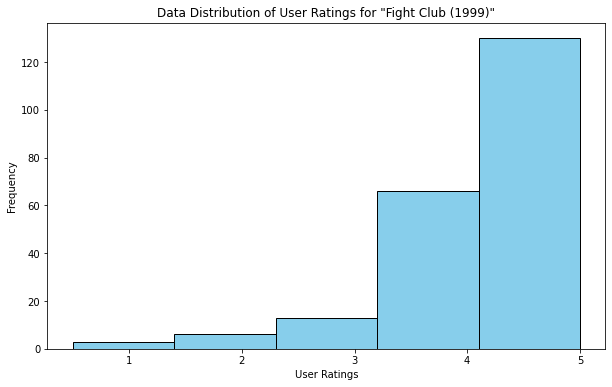

In [20]:
# Specify the movie title for "Fight Club (1999)"
movie_title = "Fight Club (1999)"

# Merge df2 with df1 to get the movieId for the specified movie title
merged_df = pd.merge(df2, df1, on='movieId')

# Get the movieId for the specified movie title
fight_club_movie_id = merged_df[merged_df['title'] == movie_title]['movieId'].iloc[0]

# Filter df2 to get ratings for "Fight Club (1999)"
fight_club_ratings = df2[df2['movieId'] == fight_club_movie_id]['rating']

# Plot the histogram
# plt.figure(figsize=(10, 6))
# sns.histplot(fight_club_ratings, kde=True, color='skyblue', edgecolor='black')
# plt.title(f'Data Distribution of User Ratings for "{movie_title}"')
# plt.xlabel('User Ratings')
# plt.ylabel('Frequency')
# plt.show()

plt.figure(figsize=(10, 6))
plt.hist(fight_club_ratings, bins=5, color='skyblue', edgecolor='black')
plt.title(f'Data Distribution of User Ratings for "{movie_title}"')
plt.xlabel('User Ratings')
plt.ylabel('Frequency')
plt.show()

In [21]:
np.mean(fight_club_ratings)

4.272935779816514

In [22]:
np.median(fight_club_ratings)

4.5

If the mean is less than the median, it's left-skewed data


#### Mandatory Operations:
1. Group the user ratings based on movieId and apply aggregation operations like count and mean on ratings. 
2. Apply inner join on dataframe created from movies.csv and the grouped df from step 1.
3. Filter only those movies which have more than 50 user ratings (i.e. > 50).

In [23]:
# Group user ratings based on movieId and apply aggregation
grouped_ratings = df2.groupby('movieId').agg({'rating': ['count', 'mean']}).reset_index()

# Rename columns for clarity
grouped_ratings.columns = ['movieId', 'rating_count', 'rating_mean']

# Inner join with df1
merged_df = pd.merge(grouped_ratings, df1, on='movieId', how='inner')

# Filter movies with more than 50 user ratings
filtered_df = merged_df[merged_df['rating_count'] > 50]

# Display the result
filtered_df.head()


,movieId,rating_count,rating_mean,title,genres
0,1,215,3.920930,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,110,3.431818,Jumanji (1995),Adventure|Children|Fantasy
2,3,52,3.259615,Grumpier Old Men (1995),Comedy|Romance
5,6,102,3.946078,Heat (1995),Action|Crime|Thriller
6,7,54,3.185185,Sabrina (1995),Comedy|Romance


### Which movie is the most popular based on  average user ratings?


In [24]:
# most popular movie based on average user ratings
most_popular_movie = filtered_df.sort_values(by='rating_mean', ascending=False).head(1)
most_popular_movie

,movieId,rating_count,rating_mean,title,genres
277,318,317,4.429022,"Shawshank Redemption, The (1994)",Crime|Drama


### Select all the correct options which comes under top 5 popular movies based on number of user ratings.

In [25]:
top5_popular_movies = filtered_df.sort_values(by='rating_count', ascending=False).head(5)
top5_popular_movies

,movieId,rating_count,rating_mean,title,genres
314,356,329,4.164134,Forrest Gump (1994),Comedy|Drama|Romance|War
277,318,317,4.429022,"Shawshank Redemption, The (1994)",Crime|Drama
257,296,307,4.197068,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
510,593,279,4.161290,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller
1938,2571,278,4.192446,"Matrix, The (1999)",Action|Sci-Fi|Thriller


In [26]:
# Filter Sci-Fi movies from the filtered_df DataFrame
sci_fi_movies = filtered_df[filtered_df['genres'].str.contains('Sci-Fi')]

# Display the third most popular Sci-Fi movie based on the number of user ratings
if len(sci_fi_movies) >= 3:
    third_most_popular_sci_fi_movie = sci_fi_movies.sort_values(by='rating_count', ascending=False).iloc[2]
    print(third_most_popular_sci_fi_movie[['title', 'rating_count']])


title           Jurassic Park (1993)
rating_count                     238
Name: 418, dtype: object


In [27]:
df4 = pd.read_csv("links.csv")

In [28]:
df4.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [29]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB


Note: there was some issue with imdb site so used an older dataset for links

### Mention the movieId of the movie which has the highest IMDB rating


In [4]:
df_links=pd.read_csv('links1.csv')

In [5]:
df_movies=pd.read_csv('movies.csv')

In [6]:
df_movies['genres'].unique()

array(['Adventure|Animation|Children|Comedy|Fantasy',
       'Adventure|Children|Fantasy', 'Comedy|Romance',
       'Comedy|Drama|Romance', 'Comedy', 'Action|Crime|Thriller',
       'Adventure|Children', 'Action', 'Action|Adventure|Thriller',
       'Comedy|Horror', 'Adventure|Animation|Children', 'Drama',
       'Action|Adventure|Romance', 'Crime|Drama', 'Drama|Romance',
       'Action|Comedy|Crime|Drama|Thriller', 'Comedy|Crime|Thriller',
       'Crime|Drama|Horror|Mystery|Thriller', 'Drama|Sci-Fi',
       'Children|Drama', 'Adventure|Drama|Fantasy|Mystery|Sci-Fi',
       'Mystery|Sci-Fi|Thriller', 'Children|Comedy', 'Drama|War',
       'Action|Crime|Drama', 'Action|Adventure|Fantasy',
       'Comedy|Drama|Thriller', 'Mystery|Thriller',
       'Animation|Children|Drama|Musical|Romance',
       'Crime|Mystery|Thriller', 'Adventure|Drama', 'Drama|Thriller',
       'Comedy|Crime', 'Action|Sci-Fi|Thriller',
       'Action|Comedy|Horror|Thriller', 'Comedy|Drama', 'Documentary',
       'Ac

In [7]:
df_ratings=pd.read_csv('ratings.csv')

In [8]:
df_tags=pd.read_csv('tags.csv')

### Number of ratings and rating per movie

In [9]:
df_ratings_grouped=pd.DataFrame((df_ratings.groupby(by='movieId')
                    .apply(lambda df_:{'num_ratings':df_['userId'].nunique(),
                                        'rating':df_['rating'].mean()
                                      }
                          )
                   ).to_dict()
                               ).T.reset_index().rename(columns={'index':'movieId'})

In [10]:
df_ratings_final=df_ratings_grouped[df_ratings_grouped['num_ratings']>50]

### Merging

In [11]:
df_final=df_ratings_final.merge(df_movies,on='movieId',how='left')

In [12]:
df_final

,movieId,num_ratings,rating,title,genres
0,1,215.0,3.920930,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,110.0,3.431818,Jumanji (1995),Adventure|Children|Fantasy
2,3,52.0,3.259615,Grumpier Old Men (1995),Comedy|Romance
3,6,102.0,3.946078,Heat (1995),Action|Crime|Thriller
4,7,54.0,3.185185,Sabrina (1995),Comedy|Romance
...,...,...,...,...,...
431,106782,54.0,3.916667,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama
432,109374,52.0,3.778846,"Grand Budapest Hotel, The (2014)",Comedy|Drama
433,109487,73.0,3.993151,Interstellar (2014),Sci-Fi|IMAX
434,112852,59.0,4.050847,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi


## Answers
### Movie Id with highest movie rating

In [13]:
df_final[df_final['rating']==df_final['rating'].max()]['movieId']

53    318
Name: movieId, dtype: int64

### movie id from scifi genre with highest rating

In [14]:
df_temp=df_final[df_final['genres'].str.contains('Sci-Fi')]

In [15]:
df_temp[df_temp['rating']==df_temp['rating'].max()]['movieId']

44    260
Name: movieId, dtype: int64